In [5]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import collections
import matplotlib.pyplot as plt

In [6]:
gdf = gpd.read_feather('4-6-2014.feather')
zones = gpd.read_file('shape_files/taxi_zones.shp')

In [7]:
gdf.shape

(1880795, 5)

In [9]:
joined = zones.to_crs(epsg=4326).sjoin(gdf)

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,index_right,Date/Time,Lat,Lon,Base
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",717086,5/14/2014 21:30:00,40.6880,-74.1828,B02598
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",659861,5/8/2014 9:45:00,40.6880,-74.1828,B02598
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",796162,5/23/2014 13:29:00,40.6880,-74.1828,B02598
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",828905,5/28/2014 15:30:00,40.6880,-74.1827,B02598
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",744932,5/17/2014 15:46:00,40.6880,-74.1817,B02598
...,...,...,...,...,...,...,...,...,...,...,...,...
262,Manhattan,262.0,262.0,0.000122,0.049064,Yorkville East,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...",1823680,6/23/2014 6:31:00,40.7705,-73.9480,B02682
262,Manhattan,262.0,262.0,0.000122,0.049064,Yorkville East,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...",563319,4/28/2014 8:19:00,40.7703,-73.9478,B02764
262,Manhattan,262.0,262.0,0.000122,0.049064,Yorkville East,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...",844634,5/30/2014 7:18:00,40.7704,-73.9480,B02598
262,Manhattan,262.0,262.0,0.000122,0.049064,Yorkville East,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...",416289,4/12/2014 8:38:00,40.7704,-73.9480,B02682


/home/amit/anaconda3/envs/uber/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


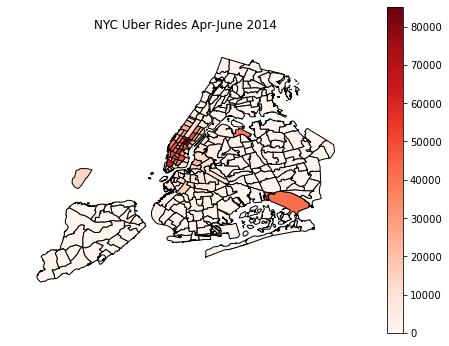

In [10]:
cnt=collections.Counter(joined['zone'])
zones['freq14'] = zones['zone'].map(cnt)
gplt.choropleth(zones, hue='freq14', cmap='Reds', legend=True)
plt.title('NYC Uber Rides Apr-June 2014')
plt.savefig('graphs/2014_uber_map', dpi=600)

<AxesSubplot:>

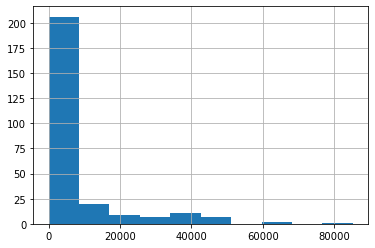

In [11]:
zones['freq14'].hist()

In [1]:
lookupdf = pd.read_csv('raw_data/taxi-zone-lookup.csv')
lookupdict = {i: j for i, j in zip(lookupdf.LocationID, lookupdf.Zone)}

NameError: name 'pd' is not defined

In [14]:
df15 = pd.read_csv('apr-june_2015.feather')

In [17]:
subset['zone_name'] = subset['locationID'].map(lookupdict)

/home/amit/anaconda3/envs/uber/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


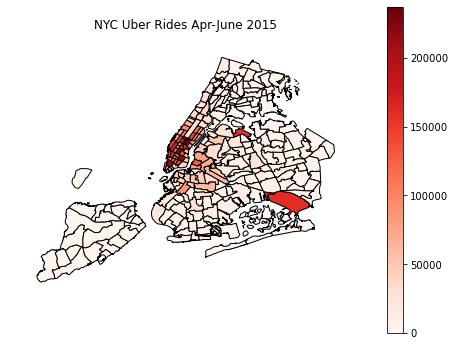

In [19]:
cnt=collections.Counter(subset['zone_name'])
zones['freq15'] = zones['zone'].map(cnt)
gplt.choropleth(zones, hue='freq15', cmap='Reds', legend=True)
plt.title('NYC Uber Rides Apr-June 2015')
plt.savefig('graphs/2015_uber_map', dpi=600)

In [22]:
zones['diff'] = zones['freq15'] - zones['freq14']
zones['diff']

0     -13084
1          5
2       2179
3      38058
4         17
       ...  
258    66732
259     2019
260    11078
261    28825
262    42778
Name: diff, Length: 263, dtype: int64

/home/amit/anaconda3/envs/uber/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


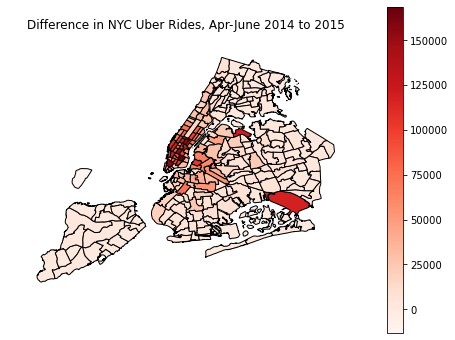

In [23]:
gplt.choropleth(zones, hue='diff', cmap='Reds', legend=True)
plt.title('Difference in NYC Uber Rides, Apr-June 2014 to 2015')
plt.savefig('uber_diff_map', dpi=600)

In [24]:
zones.to_feather('uber_zones.feather')

/tmp/ipykernel_86273/1406816206.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  zones.to_feather('uber_zones.feather')
